In [77]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import scipy.stats as ss
import seaborn as sns
sns.set_context(context="poster",font_scale=1.2)
import matplotlib.pyplot as plt

def main():
    lst=[6,8,10,15,16,24,25,40,67]
    #离散化
    binings,bins=pd.qcut(lst,q=3,retbins=True)
    print(list(bins))
    print(pd.cut(lst,bins=3))
    print(pd.cut(lst,bins=4,labels=["low","medium","high","very high"]))

    #归一化与标准化
    from sklearn.preprocessing import MinMaxScaler,StandardScaler
    print(MinMaxScaler().fit_transform(np.array([1,4,10,15,21]).reshape(-1,1)))
    print(StandardScaler().fit_transform(np.array([1,1,1,1,0,0,0,0]).reshape(-1,1)))
    print(StandardScaler().fit_transform(np.array([1, 0, 0, 0, 0, 0, 0, 0]).reshape(-1, 1)))

    #标签化与独热编码
    from sklearn.preprocessing import LabelEncoder,OneHotEncoder
    print(LabelEncoder().fit_transform(np.array(["Down","Down","Up","Down","Up"]).reshape(-1,1)))
    print(LabelEncoder().fit_transform(np.array(["Low","Medium","Low","High","Medium"]).reshape(-1,1)))
    lb_encoder=LabelEncoder()
    lb_encoder=lb_encoder.fit(np.array(["Red","Yellow","Blue","Green"]))
    lb_trans_f=lb_encoder.transform(np.array(["Red","Yellow","Blue","Green"]))
    oht_enoder=OneHotEncoder().fit(lb_trans_f.reshape(-1,1))
    print(oht_enoder.transform(lb_encoder.transform(np.array(["Red","Blue"])).reshape(-1,1)).toarray())

    #规范化
#     from sklearn.preprocessing import Normalizer
#     print(Normalizer(norm="l1").fit_transform([1,1,3,-1,2])
          
#     #LDA降维
#     from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#     X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
#     y = np.array([0, 0, 0, 1, 1, 1])
#     clf = LinearDiscriminantAnalysis()
#     clf.fit(X, y)
#     print(clf.predict([[-0.8, -1]]))
if __name__=="__main__":
    main()
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

[6.0, 13.333333333333332, 24.333333333333332, 67.0]
[(5.939, 26.333], (5.939, 26.333], (5.939, 26.333], (5.939, 26.333], (5.939, 26.333], (5.939, 26.333], (5.939, 26.333], (26.333, 46.667], (46.667, 67.0]]
Categories (3, interval[float64]): [(5.939, 26.333] < (26.333, 46.667] < (46.667, 67.0]]
[low, low, low, low, low, medium, medium, high, very high]
Categories (4, object): [low < medium < high < very high]
[[0.  ]
 [0.15]
 [0.45]
 [0.7 ]
 [1.  ]]
[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]
[[ 2.64575131]
 [-0.37796447]
 [-0.37796447]
 [-0.37796447]
 [-0.37796447]
 [-0.37796447]
 [-0.37796447]
 [-0.37796447]]
[0 0 1 0 1]
[1 2 1 0 2]
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]]


C:\Users\ni\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ni\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ni\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ni\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ni\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by St

In [78]:
df = pd.read_csv('HR.csv')
df=df.dropna(axis=0,how='any')
df=df[df.last_evaluation<=1][df.salary!='nme'][df.department!='sale']
df

C:\Users\ni\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [22]:
sl=False
scaler_lst=[sl] 
column_lst=['satisfaction_level']
for i in  scaler_lst:
    if not scaler_lst[i]:
        df[column_lst[i]]=MinMaxScaler().fit_transform( df[column_lst[i]].values.reshape(-1, 1))
        print(df[column_lst[i]])

0        0.318681
1        0.780220
2        0.021978
3        0.692308
4        0.307692
5        0.351648
6        0.010989
7        0.912088
8        0.879121
9        0.362637
10       0.395604
11       0.021978
12       0.824176
13       0.351648
14       0.296703
15       0.318681
16       0.395604
17       0.758242
18       0.395604
19       0.736264
20       0.021978
21       0.318681
22       0.000000
23       0.406593
24       0.340659
25       0.879121
26       0.802198
27       0.340659
28       0.351648
29       0.318681
           ...   
14969    0.373626
14970    0.758242
14971    0.329670
14972    0.021978
14973    0.296703
14974    0.296703
14975    0.010989
14976    0.340659
14977    0.791209
14978    0.340659
14979    0.000000
14980    0.736264
14981    0.703297
14982    0.318681
14983    0.692308
14984    0.340659
14985    0.901099
14986    0.835165
14987    0.890110
14988    0.406593
14989    0.373626
14990    0.879121
14991    0.000000
14992    0.340659
14993    0

In [79]:
#sl:satisfaction_level--False:MinMaxScaler;True:StandardScaler
#le:last_evaluation--False:MinMaxScaler;True:StandardScaler
#npr:number_project--False:MinMaxScaler;True:StandardScaler
#amh:average_monthly_hours--False:MinMaxScaler;True:StandardScaler
#tsc:time_spend_company--False:MinMaxScaler;True:StandardScaler
#wa:Work_accident--False:MinMaxScaler;True:StandardScaler
#pl5:promotion_last_5years--False:MinMaxScaler;True:StandardScaler
#dp:department--False:LabelEncoding;True:OneHotEncoding
#sa:salary--False:LabelEncoding;True:OneHotEncoding
def preprocessing(sl=False,le=False,npr=False,amh=False,tsc=False,wa=False,pl5=False,dp=False,sa=False,lower_d=False,ld_n=1):
    df=pd.read_csv('HR.csv')
    #清洗数据
    df=df.dropna(subset=['satisfaction_level','last_evaluation'])
    df=df[df.last_evaluation<=1][df.salary!='nme']
    #得到标注
    label=df['left']
    df=df.drop('left',axis=1)
    #特征选择，因为属性较少先不动
    #特征处理
    scaler_lst=[sl,le,npr,amh,tsc,wa,pl5]
    column_lst=['satisfaction_level','last_evaluation','number_project','average_monthly_hours','time_spend_company','Work_accident','promotion_last_5years']
    for i in  range(len(scaler_lst)):
        if not scaler_lst[i]:
            df[column_lst[i]]=MinMaxScaler().fit_transform( df[column_lst[i]].values.reshape(-1,1))
        else:
            df[column_lst[i]]=StandardScaler().fit_transform( df[column_lst[i]].values.reshape(-1,1))
    scaler_lst=[sa,dp]
    column_lst=['salary','department']
    for i in range(len(scaler_lst)):
        if not scaler_lst[i]:
            if column_lst[i]=='salary':
                df[column_lst[i]]=[map_salary(k) for k in df['salary'] ]
            else:    
                df[column_lst[i]]=LabelEncoder().fit_transform( df[column_lst[i]].values.reshape(-1,1))
            df[column_lst[i]]=MinMaxScaler().fit_transform( df[column_lst[i]].values.reshape(-1,1))
        else:
            df=pd.get_dummies( df,columns=[column_lst[i]])
    if lower_d:
        return PCA(n_components=ld_n).fit_transform(df.values),label
    return df,label
            
    

In [80]:
def map_salary(s):
    d=dict([('low',0),('medium',1),('high',2)])
    return d.get(s,0)

In [96]:
import os
os.environ['PATH']+=os.pathsep+'C:/Graphviz2.38/bin/'

In [99]:
def hr_modeling(feature,label):
    f_v=feature.values
    l_v=label.values
    f_names=feature.columns.values
    X_tt,X_validation,Y_tt,Y_validation=train_test_split(f_v,l_v,test_size=0.2)
    X_train,X_test,Y_train,Y_test=train_test_split(X_tt,Y_tt,test_size=0.25)
    print(len(X_train),len(X_test),len(X_validation))
    print(Y_train)
    
    #KNN
    from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
    from sklearn.metrics import accuracy_score,recall_score,f1_score
    from sklearn.naive_bayes import BernoulliNB,GaussianNB
    from sklearn.tree import DecisionTreeClassifier,export_graphviz
    from sklearn.externals.six import StringIO
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.linear_model import LogisticRegression
    from keras.models import Sequential
    from keras.layers.core import Dense,Activation
    from keras.optimizers import  SGD
    from sklearn.ensemble import GradientBoostingClassifier
    import pydotplus
    from sklearn.svm import SVC
    mods = Sequential()
    mods.add(Dense(50,input_dim=len(f_v[0])))
    mods.add(Activation('sigmoid'))
    mods.add(Dense(2))
    mods.add(Activation('softmax'))
    sgd=SGD(lr=0.01)
    mods.compile(optimizer='adam' , loss='mean_squared_error')
#     下面赋值时y的值要变为one_hot的形式，挺关键的,并且y值要变为np。arrage的,后面还有迭代次数，以及选取的随机梯度规模
#     下面if里i的值会很影响结果，为什么呢
    mods.fit(x=X_train,y=np.array([[1,0] if i==0 else [0,1] for i in Y_train]),epochs=1000,batch_size=8999)
    xy_list=[(X_train,Y_train),(X_validation,Y_validation),(X_test,Y_test)]
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve,auc,roc_auc_score
    f=plt.figure()
    for i in range(len(xy_list)):
            X_part = xy_list[i][0]
            Y_part = xy_list[i][1]
#             Y_pred = mods.predict_classes(X_part)
            Y_pred = mods.predict(X_part)
            
            Y_pred=np.array((Y_pred[:,1]).reshape(1,-1))[0]
            print(Y_pred)
#             print(i)
#             print('NN','ACC',accuracy_score(Y_part,Y_pred))
#             print('NN','REC',recall_score(Y_part,Y_pred))
#             print('NN','F-Score',f1_score(Y_part,Y_pred))
            f.add_subplot(1,3,i+1)
            fpr,tpr,threshold=roc_curve(Y_part,Y_pred)
            plt.plot(fpr,tpr)
            print('NN','AUC',auc(fpr,tpr))
            print('NN','AUC-SCORE',roc_auc_score(Y_part,Y_pred))
    plt.show()

    return
    models=[]
#     models.append(('KNN',KNeighborsClassifier(n_neighbors=3)))
#     models.append(('BernoulliNB',BernoulliNB()))
#     models.append(('GaussianNB',GaussianNB()))
#     models.append(('DecisionTreeGini',DecisionTreeClassifier()))
#     models.append(('DecisionTreeEntropy',DecisionTreeClassifier(criterion='entropy')))
#     models.append(('RandomForest',RandomForestClassifier(max_features=None,n_estimators=15)))
#     models.append(('SVC',SVC(C=10000)))
#     models.append(('GBDT',GradientBoostingClassifier(max_depth=6,n_estimators=100)))
#     models.append(('AdaBoost', AdaBoostClassifier()))
#     models.append(('Logistic',LogisticRegression(C=10000)))
#     for clf_name,clf in models:
#         clf.fit(X_train,Y_train)
#         xy_list=[(X_train,Y_train),(X_validation,Y_validation),(X_test,Y_test)]
#         for i in range(len(xy_list)):
#             X_part = xy_list[i][0]
#             Y_part = xy_list[i][1]
#             Y_pred = clf.predict(X_part)
#             print(i)
#             print(clf_name,'ACC',accuracy_score(Y_part,Y_pred))
#             print(clf_name,'REC',recall_score(Y_part,Y_pred))
#             print(clf_name,'F-Score',f1_score(Y_part,Y_pred))
#             if clf_name =='DecisionTreeClassifier':
#                 dot_data = export_graphviz(clf,feature_names=f_names,class_names=['L','NL'],filled=True,rounded=True,special_characters=True)
#                 graph= pydotplus.graph_from_dot_data(dot_data)
#                 graph.write_pdf('dt_tree.pdf')

   
  

In [ ]:

#     knn_clf3  =KNeighborsClassifier(n_neighbors=3)
#     knn_clf3.fit(X_train,Y_train)
#     Y_pred = knn_clf3.predict(X_validation)
#     print('n=3验证数据')
#     print('ACC',accuracy_score(Y_validation,Y_pred))
#     print('REC',recall_score(Y_validation,Y_pred))
#     print('F-Score',f1_score(Y_validation,Y_pred))
    
#     knn_clft  =KNeighborsClassifier(n_neighbors=3)
#     knn_clft.fit(X_train,Y_train)
#     Y_pred = knn_clft.predict(X_train)
#     from sklearn.metrics import accuracy_score,recall_score,f1_score
#     print('n=3训练数据')
#     print('ACC',accuracy_score(Y_train,Y_pred))
#     print('REC',recall_score(Y_train,Y_pred))
#     print('F-Score',f1_score(Y_train,Y_pred))
    
#     from sklearn.externals import joblib
#     joblib.dump(knn_clf3,'knn_clf3')
#     knn_clf2=joblib.load('knn_clf3')
#     Y_pred = knn_clf2.predict(X_validation)
#     print('test2')
#     print('ACC',accuracy_score(Y_validation,Y_pred))
#     print('REC',recall_score(Y_validation,Y_pred))
#     print('F-Score',f1_score(Y_validation,Y_pred))

In [ ]:
#递增方式选择特征值的方法，还没想好放置在什么位置
selected_features = features[:]
best_acc = 0
while len(rest_features)>0:
    temp_best_i=''
    temp_best_acc = 0
    for feature_i in rest_features:
        temp_features = selected_features + [feature_i,]
        x = iris[temp_features]
        scores = cross_val_score(lm,x,y,cv=5.scorin='accuracy')
        acc = np.mean(scores)
        if acc > temp_best_acc:
            temp_best_acc = acc 
            temp_best_i = feature_i
    print('select',temp_best_i,'acc',temp_best_acc)
    if temp_best_acc > best_acc:
        best_acc=temp_best_acc
        selected_features+=[temp_best_i,]
        rest_featrues.remove(temp_best_i)
    else:
        break
print('best feature set:',selected_features,'acc:',best_acc)


In [ ]:
#使用随机森林找特种的mean decrease accurary方法，用的时候需要修改
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=10,test_size==0.1)
scores = np.zores((10,4))
count = 0
for train_idx,test_idx in rs.split(X):
    X_train,X_test = X(train_idx),X(test_idx)
    y_train,y_test = y(train_idx),y(test_idx)
    r = rf.fit(X_train,y_train)
    acc = accuracy_score(y_test,rf.predict(X_test))
    for i in range(len(features)):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:,i])
        shuff_acc = accuracy_score(y_test,rf.predict(X_t))
        scores[count,i] = ((acc-shuff_acc/acc)/acc)
    count += 1 
print(np.mean(scores,axis=0))

In [27]:
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score,recall_score,f1_score
knn_clf2=joblib.load('knn_clf3')
print('test2')
print('ACC',accuracy_score(Y_validation,Y_pred))
print('REC',recall_score(Y_validation,Y_pred))
print('F-Score',f1_score(Y_validation,Y_pred))


test2


NameError: name 'Y_validation' is not defined

In [82]:
def main():
    feature,label = preprocessing()
    hr_modeling(feature,label)

C:\Users\ni\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ni\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ni\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ni\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ni\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxSc

8999 3000 3000
[0 1 0 ... 0 1 1]
Epoch 1/1000
8999/8999 [==============================] - 1s 97us/step - loss: 0.3601
Epoch 2/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.3483
Epoch 3/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.3366
Epoch 4/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.3253
Epoch 5/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.3142
Epoch 6/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.3035
Epoch 7/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.2935
Epoch 8/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.2836
Epoch 9/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.2742
Epoch 10/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.2652
Epoch 11/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.2568
Epoch 12/1000
8999/8999 [====

Epoch 96/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1840
Epoch 97/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1840
Epoch 98/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1839
Epoch 99/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1839
Epoch 100/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1838
Epoch 101/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1838
Epoch 102/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1837
Epoch 103/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1837
Epoch 104/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1836
Epoch 105/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1836
Epoch 106/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1835
Epoch 107/1000
8999/8999 [=====================

Epoch 191/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1789
Epoch 192/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1788
Epoch 193/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1788
Epoch 194/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1787
Epoch 195/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1787
Epoch 196/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1786
Epoch 197/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1785
Epoch 198/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1785
Epoch 199/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1784
Epoch 200/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1784
Epoch 201/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1783
Epoch 202/1000
8999/8999 [=================

8999/8999 [==============================] - 0s 1us/step - loss: 0.1732
Epoch 286/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1732
Epoch 287/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1731
Epoch 288/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1730
Epoch 289/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1730
Epoch 290/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1729
Epoch 291/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1729
Epoch 292/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1728
Epoch 293/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1727
Epoch 294/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1727
Epoch 295/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1726
Epoch 296/1000
8999/8999 [==============================] 

Epoch 380/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1672
Epoch 381/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1672
Epoch 382/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1671
Epoch 383/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1670
Epoch 384/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1670
Epoch 385/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1669
Epoch 386/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1668
Epoch 387/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1668
Epoch 388/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1667
Epoch 389/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1666
Epoch 390/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1666
Epoch 391/1000
8999/8999 [=================

8999/8999 [==============================] - 0s 1us/step - loss: 0.1614
Epoch 475/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1613
Epoch 476/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1613
Epoch 477/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1612
Epoch 478/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1612
Epoch 479/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1611
Epoch 480/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1610
Epoch 481/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1610
Epoch 482/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1609
Epoch 483/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1609
Epoch 484/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1608
Epoch 485/1000
8999/8999 [==============================] 

Epoch 569/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1562
Epoch 570/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1562
Epoch 571/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1562
Epoch 572/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1561
Epoch 573/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1561
Epoch 574/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1560
Epoch 575/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1560
Epoch 576/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1559
Epoch 577/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1559
Epoch 578/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1558
Epoch 579/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1558
Epoch 580/1000
8999/8999 [=================

8999/8999 [==============================] - 0s 1us/step - loss: 0.1522
Epoch 664/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1522
Epoch 665/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1521
Epoch 666/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1521
Epoch 667/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1521
Epoch 668/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1520
Epoch 669/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1520
Epoch 670/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1519
Epoch 671/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1519
Epoch 672/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1519
Epoch 673/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1518
Epoch 674/1000
8999/8999 [==============================] 

Epoch 758/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1491
Epoch 759/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1490
Epoch 760/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1490
Epoch 761/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1490
Epoch 762/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1489
Epoch 763/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1489
Epoch 764/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1489
Epoch 765/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1489
Epoch 766/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1488
Epoch 767/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1488
Epoch 768/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1488
Epoch 769/1000
8999/8999 [=================

8999/8999 [==============================] - 0s 1us/step - loss: 0.1466
Epoch 853/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1466
Epoch 854/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1466
Epoch 855/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1465
Epoch 856/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1465
Epoch 857/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1465
Epoch 858/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1465
Epoch 859/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1464
Epoch 860/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1464
Epoch 861/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1464
Epoch 862/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1464
Epoch 863/1000
8999/8999 [==============================] 

Epoch 947/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1446
Epoch 948/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1446
Epoch 949/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1446
Epoch 950/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1446
Epoch 951/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1446
Epoch 952/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1445
Epoch 953/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1445
Epoch 954/1000
8999/8999 [==============================] - 0s 1us/step - loss: 0.1445
Epoch 955/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1445
Epoch 956/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1445
Epoch 957/1000
8999/8999 [==============================] - 0s 2us/step - loss: 0.1445
Epoch 958/1000
8999/8999 [=================

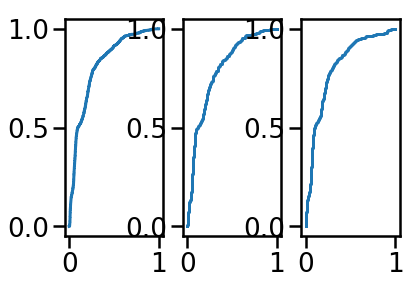

In [100]:
main()

In [47]:
feature,label = preprocessing()
f_v=feature.values
l_v=label.values
f_names=feature.columns.values
X_tt,X_validation,Y_tt,Y_validation=train_test_split(f_v,l_v,test_size=0.2)
X_train,X_test,Y_train,Y_test=train_test_split(X_tt,Y_tt,test_size=0.25)
Y_train

C:\Users\ni\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ni\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ni\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ni\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ni\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxSc

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)